<h1 style="text-align: center; border-top: 2px solid black; border-bottom: 2px solid black; padding: 10px;">
  DATA EXPLORATION & DATA ANALYSIS
</h1>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast

In [53]:
data = pd.read_csv('data.csv')

df = data[['Tên sản phẩm', 'Giá mới', 'Thông số kỹ thuật']].reset_index(drop=True)
# reset columns -> "Tên, Giá, Thông số"
df.columns = ['Tên', 'Giá', 'Thông số']

df = df.dropna(subset=['Giá'])
df.drop_duplicates(subset=['Tên'], inplace=True)
df.drop(df[df['Giá'] == 'Liên hệ'].index, inplace=True)
df.sample(5)

,Tên,Giá,Thông số
1189,Điện thoại Asus ROG Phone 5 5G (Snapdragon 888),13.950.000 ₫,"{""Màn hình:"": ""AMOLED, 1 tỷ màu, 144Hz, HDR10+..."
1018,Điện thoại Samsung Galaxy S20 Plus Cũ 5G (Snap...,4.650.000 ₫,"{""Màn hình:"": ""Dynamic AMOLED 2X, 120Hz, HDR10..."
461,Điện thoại Vivo X200 5G (Dimensity 9400),15.950.000 ₫,"{""Màn hình:"": ""AMOLED, 1 tỷ màu, 120Hz, HDR10+..."
1260,Điện thoại Nokia X7 2018,5.450.000 ₫,"{""Màn hình:"": ""FullHD+"", ""Hệ điều hành:"": ""And..."
746,Điện thoại OPPO Reno7 Pro (Chính hãng),17.450.000 ₫,"{""Màn hình:"": ""AMOLED, 90Hz, HDR10+, 920 nits ..."


In [54]:
df.shape

(1031, 3)

In [55]:
# count value of data
df['Giá'] = df['Giá'].str.replace('₫', '').str.replace('.', '').astype(int)

In [56]:
# explode thông số
explode = df['Thông số'].apply(lambda x: ast.literal_eval(x)).apply(pd.Series)
explode.columns = ['man_hinh', 'he_dieu_hanh', 'camera_sau', 'camera_truoc', 'cpu', 'ram', 'bo_nho_trong', 'the_sim', 'dung_luong_pin', 'thiet_ke']
# only get man_hinh, cpu, ram, bo_nho_trong, dung luong pin
explode = explode[['man_hinh', 'cpu', 'ram', 'bo_nho_trong', 'dung_luong_pin']]
df = pd.concat([df, explode], axis=1)
df.drop(["Thông số"], axis=1, inplace=True)

df.info()

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 0 to 1385
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tên             1031 non-null   object
 1   Giá             1031 non-null   int32 
 2   man_hinh        1031 non-null   object
 3   cpu             1031 non-null   object
 4   ram             1031 non-null   object
 5   bo_nho_trong    1031 non-null   object
 6   dung_luong_pin  1031 non-null   object
dtypes: int32(1), object(6)
memory usage: 60.4+ KB


In [59]:
import re
df['dung_luong_pin'].value_counts()

dung_luong_pin
Li-Po 5000 mAh\nSạc nhanh 18W                                                                                 22
Li-Po 5000 mAh\nSạc nhanh 33W                                                                                 22
Li-Po 5000 mAh\nSạc nhanh 15W                                                                                 11
Li-Po 5000 mAh\nSạc 10W                                                                                       10
Li-Po 5000 mAh\nSạc nhanh 25W                                                                                  8
                                                                                                              ..
Li-Po 4600 mAh\nSạc nhanh 80W\nSạc 1-50% pin trong 18 ph (QC)                                                  1
Li-Po 4700 mAh\nSạc nhanh 80W, PD, QC3\nSạc 1-100% pin 27 ph\nHỗ trợ sạc ngược có dây                          1
5500 mAh\nSạc nhanh 100W                                                         

In [ ]:
def extract_mah(value):
    match = re.search(r'(\d+)\s?mAh', value)
    if match:
        return int(match.group(1))
    return None

# Áp dụng hàm vào cột 'dung_luong_pin'
df['Pin'] = df['dung_luong_pin'].apply(extract_mah)

# Hiển thị kết quả
print(df[['dung_luong_pin', 'Pin']])

                                         dung_luong_pin     Pin
0     3000 mAh\nSạc nhanh 18W\nSạc không dây (chỉ bả...  3000.0
1                               Li-Po 5000 mAh\nSạc 10W  5000.0
2                         Li-Po 5000 mAh\nSạc nhanh 18W  5000.0
3                         Li-Po 5000 mAh\nSạc nhanh 18W  5000.0
4           Li-Po 5000 mAh\nSạc 18W\n(sạc theo máy 10W)  5000.0
...                                                 ...     ...
1381                                           4000 mAh  4000.0
1382                           3700 mAh - Sạc nhanh 20W  3700.0
1383    3500 mAh, sạc nhanh 40W (sạc 85% trong 30 phút)  3500.0
1384                           4500 mAh - sạc nhanh 50W  4500.0
1385                            4200 mAh, sạc nhanh 40W  4200.0

[1031 rows x 2 columns]


In [64]:
df.drop(['dung_luong_pin','dung_luong_mah'], axis=1, inplace=True)

In [69]:
# Hàm trích xuất số đầu tiên
def extract_ram(value):
    match = re.search(r'(\d+)', value)  # Tìm số đầu tiên trong chuỗi
    if match:
        return int(match.group(1))  # Chuyển thành kiểu int
    return None

# Tạo cột mới với giá trị số RAM
df['RAM'] = df['ram'].apply(extract_ram)

In [71]:
df.drop(['ram'], axis=1, inplace=True)

In [73]:
# Hàm trích xuất dung lượng bộ nhớ đầu tiên
def extract_storage(value):
    match = re.search(r'(\d+)', value)  # Tìm số đầu tiên trong chuỗi
    if match:
        return int(match.group(1))  # Chuyển thành kiểu int
    return None

# Áp dụng hàm để tạo cột mới "Bộ nhớ"
df['Bộ nhớ'] = df['bo_nho_trong'].apply(extract_storage)

In [74]:
df.drop(['bo_nho_trong'], axis=1, inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031 entries, 0 to 1385
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tên       1031 non-null   object 
 1   Giá       1031 non-null   int32  
 2   man_hinh  1031 non-null   object 
 3   cpu       1031 non-null   object 
 4   Pin       1009 non-null   float64
 5   RAM       1027 non-null   float64
 6   Bộ nhớ    1026 non-null   float64
dtypes: float64(3), int32(1), object(3)
memory usage: 60.4+ KB


In [79]:
# Hàm lấy nội dung trước ký tự xuống dòng (\n)
def extract_cpu(value):
    return value.split('\n')[0]  # Tách chuỗi bằng '\n' và lấy phần đầu tiên

# Áp dụng hàm để tạo cột mới "CPU"
df['CPU'] = df['cpu'].apply(extract_cpu)

df.drop(['cpu'], axis=1, inplace=True)

df['CPU'].astype('category')

0       Qualcomm SDM845 Snapdragon 845 (10 nm)
1            Mediatek MT6769Z Helio G85 (12nm)
2              MediaTek Dimensity 6100+ (6 nm)
3           Qualcomm Snapdragon 4 Gen 2 (4 nm)
4            Mediatek MT6769Z Helio G85 (12nm)
                         ...                  
1381                           Snapdragon 855+
1382            Qualcomm Snapdragon 855 (7 nm)
1383                HiSilicon Kirin 980 (7 nm)
1384           Qualcomm Snapdragon 865 (7 nm+)
1385                HiSilicon Kirin 980 (7 nm)
Name: CPU, Length: 1031, dtype: category
Categories (388, object): ['', '- Châu Âu: Exynos 2200 (4 nm)', '1. Bản 4G: SDM845 Snapdragon 845 (10 nm)', '1. Quốc tế:', ..., 'Unisoc Tiger T606 (12 nm)', 'Unisoc Tiger T612 (12 nm)', 'Unisoc Tiger T616 (12 nm)', 'Unisoc Tiger T820 (6 nm)']

In [87]:
def extract_screen_features(value):
    import re
    screen_features = {
        "size_inch": None,
        "panel_type": None,
    }
    
    # Kích thước màn hình (ví dụ: 6.7 inches)
    size_match = re.search(r'(\d+\.?\d*)\s?inches', value)
    if size_match:
        screen_features["size_inch"] = float(size_match.group(1))
    
    # Loại tấm nền (AMOLED, OLED, IPS)
    if "AMOLED" in value:
        screen_features["panel_type"] = "AMOLED"
    elif "OLED" in value:
        screen_features["panel_type"] = "OLED"
    elif "IPS" in value:
        screen_features["panel_type"] = "IPS LCD"
        
    return screen_features

# Áp dụng và tách các tính năng
screen_data = df['man_hinh'].apply(extract_screen_features)
df_screen = pd.DataFrame(screen_data.tolist())

df = pd.concat([df, df_screen], axis=1)


In [89]:
df.drop(['man_hinh'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 955
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tên         1031 non-null   object 
 1   Giá         1031 non-null   float64
 2   Pin         1009 non-null   float64
 3   RAM         1027 non-null   float64
 4   Bộ nhớ      1026 non-null   float64
 5   CPU         1031 non-null   object 
 6   size_inch   988 non-null    float64
 7   panel_type  966 non-null    object 
dtypes: float64(5), object(3)
memory usage: 93.4+ KB


In [ ]:
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 1030
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tên         670 non-null    object 
 1   Giá         670 non-null    float64
 2   Pin         670 non-null    float64
 3   RAM         670 non-null    float64
 4   Bộ nhớ      670 non-null    float64
 5   CPU         670 non-null    object 
 6   size_inch   670 non-null    float64
 7   panel_type  670 non-null    object 
dtypes: float64(5), object(3)
memory usage: 47.1+ KB


,Tên,Giá,Pin,RAM,Bộ nhớ,CPU,size_inch,panel_type
930,Điện thoại OPPO A2x 5G (Dimensity 6020),2650000.0,5000.0,6.0,128.0,Mediatek Dimensity 6020 (7 nm),6.30,IPS LCD
490,Điện thoại Motorola Razr 40 Ultra (Snapdragon ...,18850000.0,3800.0,8.0,2567.0,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),6.90,AMOLED
361,Điện thoại Vivo V29 Lite 5G (Snapdragon 695 5G),9350000.0,5000.0,8.0,128.0,Qualcomm SM6375 Snapdragon 695 5G (6 nm),6.78,AMOLED
17,Điện thoại Xiaomi Redmi Note 11 Pro Plus 5G (D...,3650000.0,4500.0,6.0,128.0,MediaTek Dimensity 920 5G (6 nm),6.67,AMOLED
497,Điện thoại Sony Xperia 5 IV (5 Mark 4) 5G (Sna...,18995000.0,5000.0,8.0,128.0,Qualcomm SM8475 Snapdragon 8 Gen 1 (4 nm),6.10,OLED
323,Điện thoại Xiaomi Mi 11 Ultra cũ (Đẹp 99% - Gi...,7650000.0,5000.0,8.0,256.0,Qualcomm SM8350 Snapdragon 888 5G (5 nm),6.81,AMOLED
1006,Điện thoại Realme Q5 Pro cũ,4450000.0,5000.0,6.0,128.0,Qualcomm SM8250-AC Snapdragon 870 5G (7 nm),26.00,IPS LCD
277,Điện thoại OnePlus Nord CE 4 Lite 5G (Màn AMOL...,6590000.0,5500.0,8.0,128.0,Qualcomm SM6375 Snapdragon 695 5G (6 nm),6.67,AMOLED
482,"Điện thoại iPhone 13 Chính hãng VN/A (128GB, 2...",17450000.0,3240.0,4.0,128.0,Apple A15 Bionic (5 nm),6.10,OLED
553,Điện thoại Google Pixel Fold (Google Tensor G2),39890000.0,4821.0,12.0,256.0,Google Tensor G2 (5 nm),7.60,OLED


In [92]:
# reset index
df_cleaned.reset_index(drop=True, inplace=True)

In [93]:
df_cleaned.to_csv('cleaned_data.csv', index=False)

# PHÂN TÍCH VÀ TRỰC QUAN HÓA

### Phân tích tương quan

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tên         670 non-null    object 
 1   Giá         670 non-null    float64
 2   Pin         670 non-null    float64
 3   RAM         670 non-null    float64
 4   Bộ nhớ      670 non-null    float64
 5   CPU         670 non-null    object 
 6   size_inch   670 non-null    float64
 7   panel_type  670 non-null    object 
dtypes: float64(5), object(3)
memory usage: 42.0+ KB
None
                Giá          Pin         RAM       Bộ nhớ   size_inch
count  6.700000e+02   670.000000  670.000000   670.000000  670.000000
mean   8.982888e+06  4925.765672    8.132836   182.586567    6.734876
std    6.965636e+06   735.524620    3.182815   135.797388    1.384466
min    1.550000e+06     0.000000    2.000000     1.000000    3.000000
25%    4.050000e+06  4700.000000    6.000000   128.000000    6.570000
50%    6

In [98]:
# lọc các cột numeric
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Tính ma trận tương quan
correlation_matrix = numeric_columns.corr()

# In ma trận tương quan
print(correlation_matrix)

                Giá       Pin       RAM    Bộ nhớ  size_inch
Giá        1.000000 -0.045362  0.610041  0.385892   0.046199
Pin       -0.045362  1.000000  0.172888  0.063334   0.030352
RAM        0.610041  0.172888  1.000000  0.512163   0.046219
Bộ nhớ     0.385892  0.063334  0.512163  1.000000   0.030229
size_inch  0.046199  0.030352  0.046219  0.030229   1.000000


#### Trực quan hóa ma trận tương quan

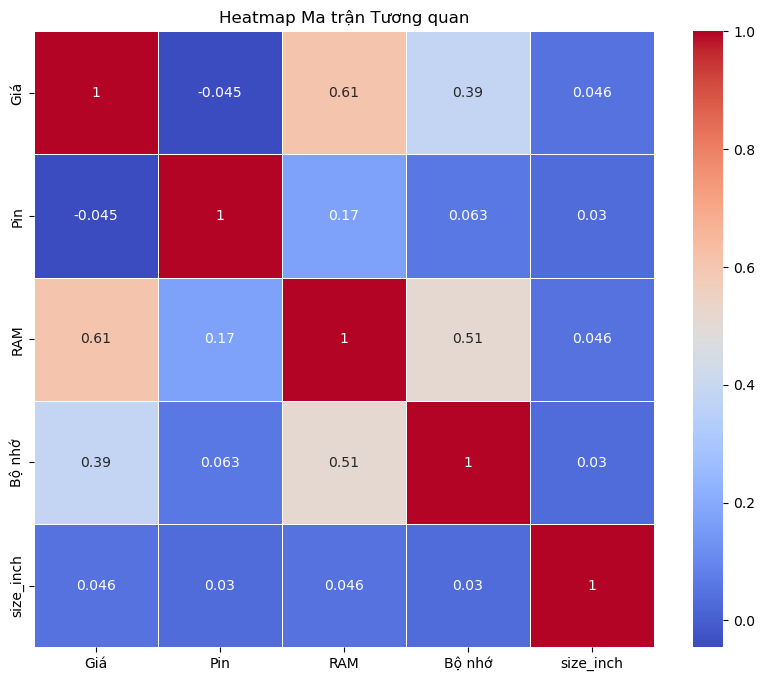

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Ma trận Tương quan")
plt.show()

Nhận xét:
- **RAM** có ảnh hưởng mạnh nhất đến giá điện thoại với hệ số tương quan **0.61** (cùng chiều).
- **Bộ nhớ** có ảnh hưởng đến giá, nhưng mức độ yếu hơn với hệ số tương quan **0.39**.
- **Pin** và **size_inch** gần như không ảnh hưởng đến giá với hệ số tương quan gần bằng **0**.
- Để tối ưu giá trị điện thoại, nên tập trung vào cải thiện **RAM** và **Bộ nhớ**.

#### TRỰC QUAN HÓA CÁC MỐI QUAN HỆ GIỮA CÁC ĐẶC TRƯNG VÀ GIÁ

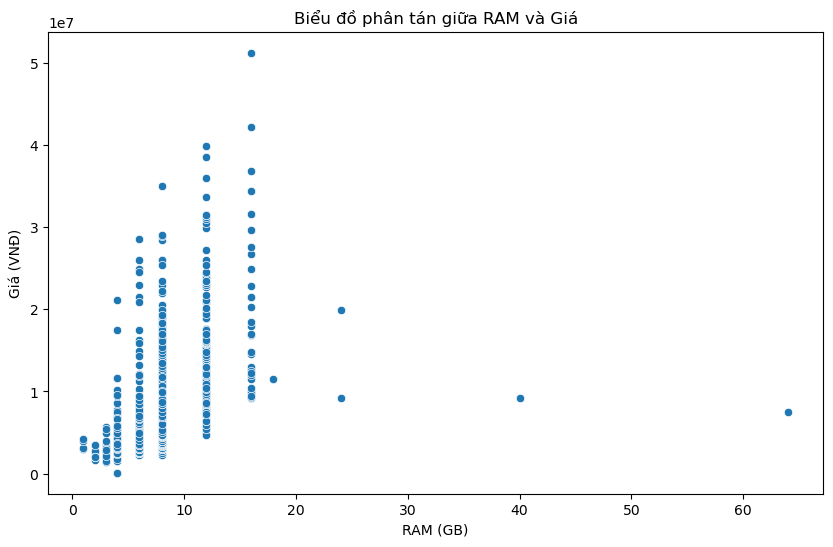

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Giá', data=df)
plt.title('Biểu đồ phân tán giữa RAM và Giá')
plt.xlabel('RAM (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

Nhận xét:
- **Mối quan hệ giữa `RAM` và `Giá` có xu hướng tăng dần**, thể hiện rằng khi `RAM` tăng, `Giá` cũng có xu hướng tăng theo.
- **Sự phân bố giá trị `RAM` chủ yếu tập trung ở mức dưới 10 GB**, với giá trị `Giá` trải rộng từ thấp đến cao.
- **Có một số điểm ngoại lệ (`outliers`)** ở mức `RAM` rất cao (hơn 30 GB), nhưng `Giá` không tương ứng cao, cần kiểm tra lại tính hợp lý của những giá trị này.
- **Độ phân tán ở mức `RAM` cao lớn hơn**, cho thấy sự không đồng nhất của giá khi `RAM` vượt quá 10 GB.

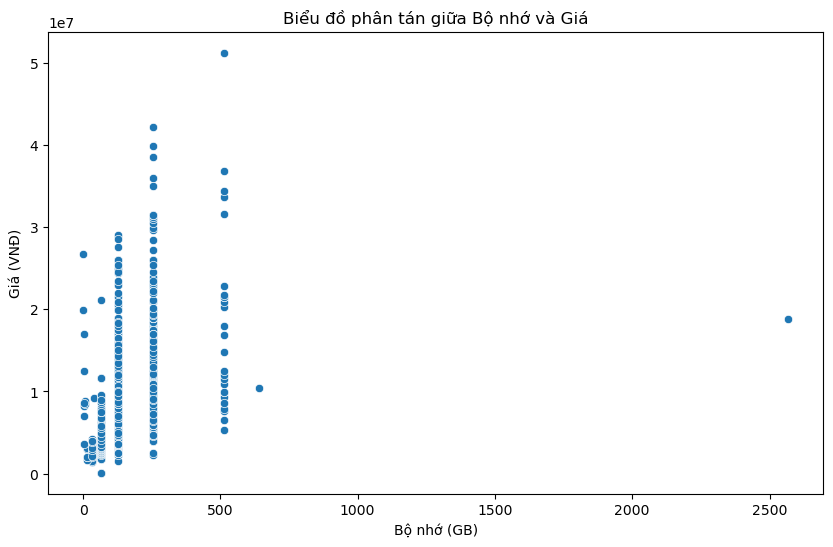

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bộ nhớ', y='Giá', data=df)
plt.title('Biểu đồ phân tán giữa Bộ nhớ và Giá')
plt.xlabel('Bộ nhớ (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

Nhận xét:
- **Giá trị `Bộ nhớ` chủ yếu tập trung dưới 500 GB**.
- **Mối quan hệ giữa `Bộ nhớ` và `Giá` không rõ ràng**, sự phân tán giá khá rộng, cho thấy `Bộ nhớ` không phải là yếu tố quyết định mạnh nhất đến `Giá`.
- **Có một số điểm ngoại lệ (outliers)** ở mức `Bộ nhớ` rất cao, cần kiểm tra lại tính hợp lý của các giá trị này.
- **Giá trị `Giá` trải rộng ở mọi mức `Bộ nhớ`**, gợi ý rằng `Giá` còn bị ảnh hưởng bởi các yếu tố khác ngoài `Bộ nhớ`.

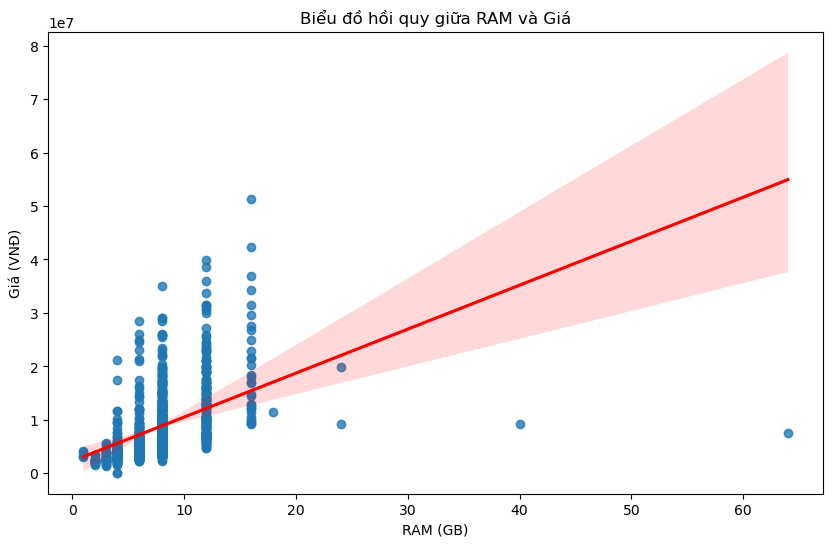

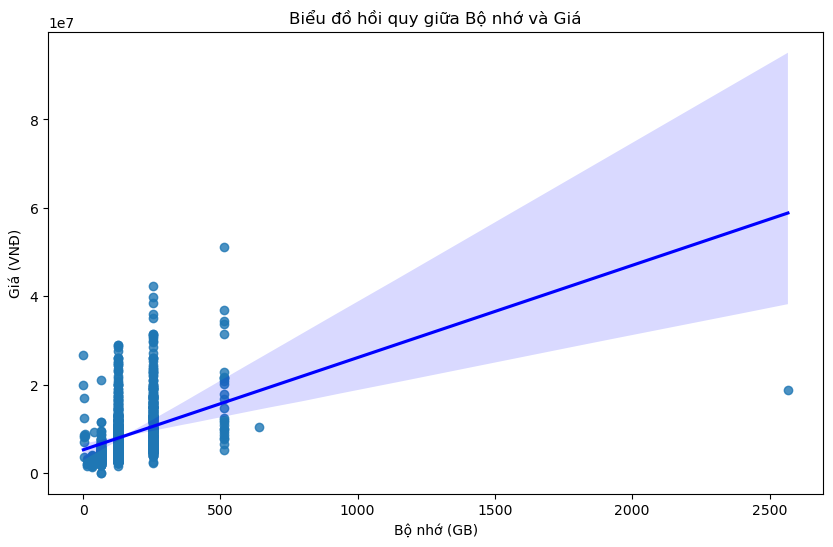

In [104]:
# Biểu đồ hồi quy cho RAM và Giá
plt.figure(figsize=(10, 6))
sns.regplot(x='RAM', y='Giá', data=df, line_kws={"color": "red"})
plt.title('Biểu đồ hồi quy giữa RAM và Giá')
plt.xlabel('RAM (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

# Biểu đồ hồi quy cho Bộ nhớ và Giá
plt.figure(figsize=(10, 6))
sns.regplot(x='Bộ nhớ', y='Giá', data=df, line_kws={"color": "blue"})
plt.title('Biểu đồ hồi quy giữa Bộ nhớ và Giá')
plt.xlabel('Bộ nhớ (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()


Nhận xét:
- **RAM có mối quan hệ mạnh với Giá**, thể hiện qua độ dốc lớn của đường hồi quy.
- **Bộ nhớ cũng có mối quan hệ dương với Giá**, nhưng yếu hơn so với RAM.
- **Vùng không chắc chắn** (confidence interval) mở rộng khi `RAM` và `Bộ nhớ` tăng, cho thấy sự phân tán lớn và độ không chắc chắn cao.
- **Có các điểm ngoại lệ** ở mức `RAM` và `Bộ nhớ` cao, cần kiểm tra lại để đảm bảo tính hợp lý của dữ liệu.

c:\Users\LENOVO\anaconda3\envs\nhb2709-env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


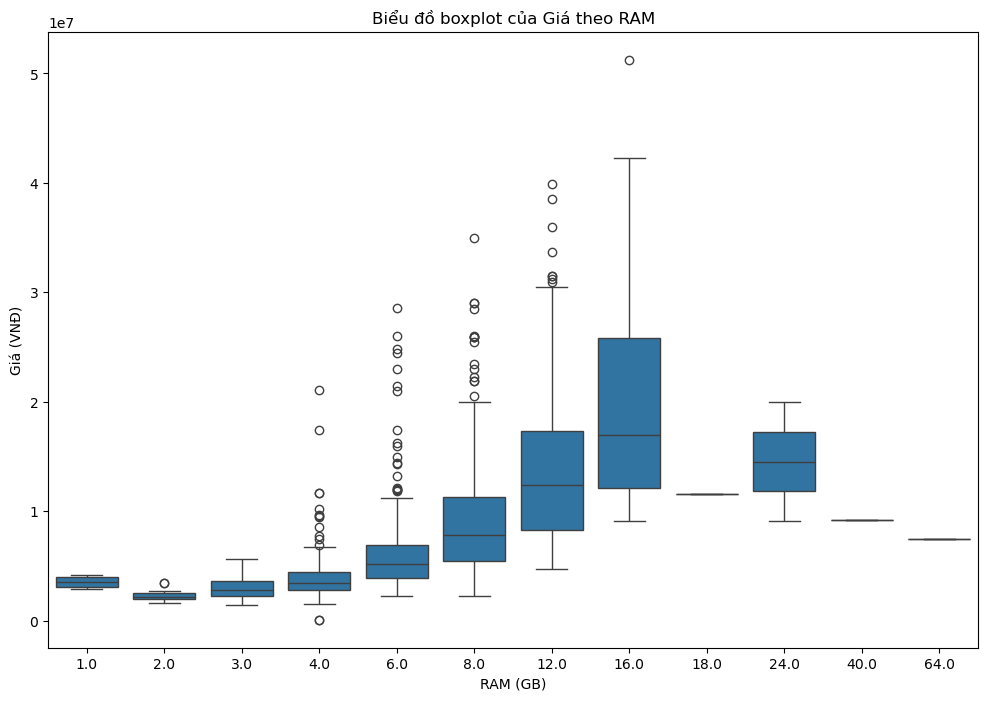

c:\Users\LENOVO\anaconda3\envs\nhb2709-env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


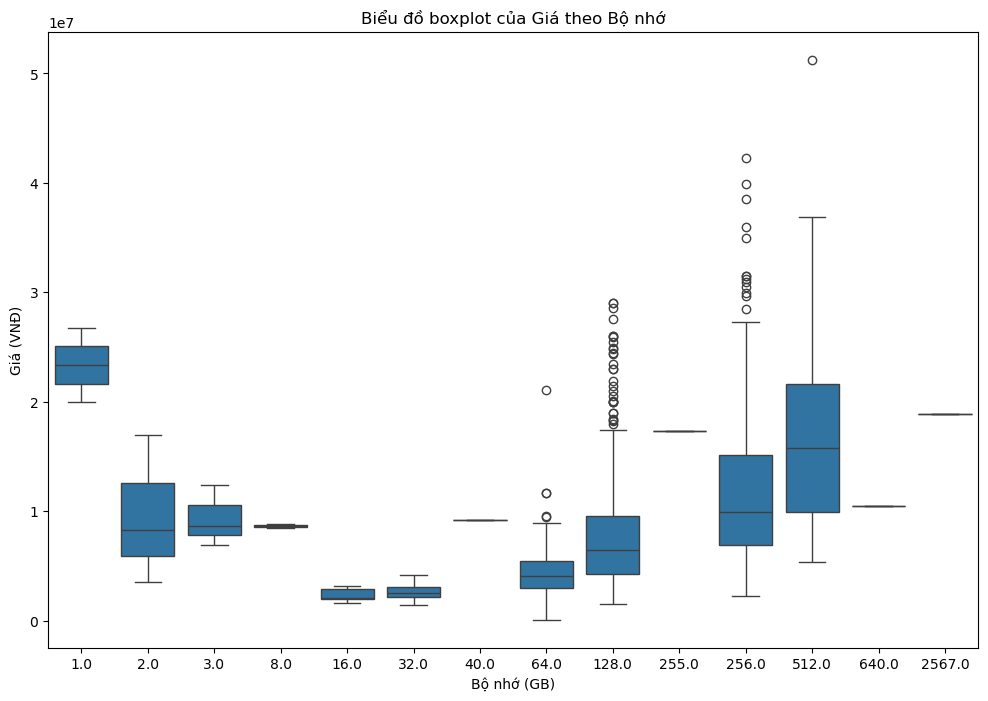

In [105]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RAM', y='Giá', data=df)
plt.title('Biểu đồ boxplot của Giá theo RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Bộ nhớ', y='Giá', data=df)
plt.title('Biểu đồ boxplot của Giá theo Bộ nhớ')
plt.xlabel('Bộ nhớ (GB)')
plt.ylabel('Giá (VNĐ)')
plt.show()

Nhận xét:
- **Giá tăng dần khi RAM và Bộ nhớ tăng**, đặc biệt từ 8 GB RAM và 128 GB Bộ nhớ trở lên.
- **Sự phân tán giá cao** ở các mức `RAM` 8-16 GB và `Bộ nhớ` 128-512 GB, cho thấy sự đa dạng về giá trong các phân khúc này.
- **Nhiều điểm ngoại lệ** xuất hiện ở các mức `RAM` và `Bộ nhớ` cao, có thể là sản phẩm đặc biệt hoặc dữ liệu không phổ biến.
- **Mức RAM và Bộ nhớ rất cao** (> 24 GB RAM, > 512 GB Bộ nhớ) có ít dữ liệu, dẫn đến sự không ổn định về giá.